# CE282: Linear Algebra

## Final Project

Full Name: نیکان واسعی چهارمحالی

Student ID: 400105303


## Q1: Spectral Clustering (100 Points)

## Introduction
Spectral clustering is a clustering technique that uses the spectrum of the similarity matrix to perform dimensionality reduction before clustering in fewer dimensions. It is a powerful technique that can identify clusters of arbitrary shape and is robust to noise. It is also a popular technique for image segmentation. In this notebook, we will implement spectral clustering from scratch and apply it to graphs and kNN circles.

## Graph Implementation
In this section, we will implement a graph class that will be used to represent the similarity matrix. The graph class will have the following attributes and methods:
* **N**: the number of nodes in the graph
* **nodes**: the set of nodes in the graph
* **vertices**: the dict of edges of each node
* **add_node**: Add a node to the graph
* **connect**: Connect two nodes with an edge
* **disconnect**: Disconnect two nodes

In [332]:
class Graph:
    def __init__(self) -> None:
        self.N: int = 0
        self.nodes: set[int] = set()
        self.vertices: dict[int, set[int]] = dict()

    def add_node(self):
        # TODO: add node
        self.nodes.add(self.N)
        self.vertices[self.N] = set()
        self.N += 1
        pass

    def connect(self, A: int, B: int):
        assert A < self.N
        assert A >= 0
        assert B < self.N
        assert B >= 0
        assert A != B
        # TODO: connect A and B
        self.vertices[A].add(B)
        self.vertices[B].add(A)
        pass

    def disconnect(self, A: int, B: int):
        assert A < self.N
        assert A >= 0
        assert B < self.N
        assert B >= 0
        assert A != B
        assert A in self.vertices[B]
        assert B in self.vertices[A]
        # TODO: disconnect A and B
        self.vertices[A].remove(B)
        self.vertices[B].remove(A)
        pass

## Constructing the Similarity Matrix
First we need to construct adjacency matrix.
Adjacency matrix is a matrix of size $N \times N$, where $N$ is the number of nodes in the graph. The entry $A_{ij} = 1$ if there is an edge connecting node $i$ and node $j$. If there is no edge connecting node $i$ and node $j$, then $A_{ij} = 0$.

In [333]:
import numpy as np

def adjacency_matrix(graph: Graph) -> np.ndarray[int]:
    # TODO: return adjacency matrix
    adj = np.ndarray(shape=(graph.N, graph.N), dtype=np.int64)
    for i in graph.nodes:
        for j in graph.nodes:
            if j in graph.vertices[i]:
                adj[i, j] = 1
            else:
                adj[i, j] = 0
    return adj

Then we need to construct the degree matrix.
Degree matrix is a diagonal matrix of size $N \times N$, where $N$ is the number of nodes in the graph. The entry $D_{ii}$ is the degree of node $i$, i.e. the number of edges connected to node $i$. All other entries are 0.

In [334]:
def degree_matrix(graph: Graph) -> np.ndarray[int]:
    # TODO: return degree matrix
    deg = np.ndarray(shape=(graph.N, graph.N), dtype=np.int64)
    for i in range(deg.shape[0]):
        for j in range(deg.shape[1]):
            if i == j:
                deg[i, j] = len(graph.vertices[i])
            else:
                deg[i, j] = 0
    return deg

Finally, we can construct the laplacian matrix.
Laplacian matrix is a matrix of size $N \times N$, where $N$ is the number of nodes in the graph. There are many ways to define the laplacian between two nodes. In this notebook, we will use normal Laplacian similarity matrix, which is defined as:
\begin{equation}
S_{ij} = D_{ij} - A_{ij}
\end{equation}
where $D_{ij}$ is the degree matrix and $A_{ij}$ is the adjacency matrix.

In [335]:
def laplacian_matrix(graph: Graph) -> np.ndarray[int]:
    # TODO: return laplacian matrix
    lap = degree_matrix(graph) - adjacency_matrix(graph)
    return lap

## Calculating Eigenvectors and Eigenvalues
After constructing the similarity matrix, we can calculate the eigenvectors and eigenvalues of the similarity matrix. We can then use the eigenvectors to perform dimensionality reduction. In this notebook, we will use the eigenvectors corresponding to the $k$ smallest eigenvalues, where $k$ is the number of clusters.

* Eigenvalues of laplacian matrix are always non-negative. Laplacian matrix is a positive semi-definite matrix.
* The first eigenvalue is always 0, and the corresponding eigenvector is the vector of all ones since the sum of each row of the laplacian matrix is 0.
* The second smallest eigenvalue is called the Fielder value (Algebraic connectivity). It is a measure of how well connected the graph is after removing the most poorly connected node. The Fielder value is often used to approximate sparsest cut of the graph. If the graph is connected, then the Fielder value is positive. If the graph is disconnected, then the Fielder value is 0. The number of times 0 appears as an eigenvalue is equal to the number of connected components in the graph.

In [336]:
def laplacian_values(graph: Graph, K: int) -> tuple[np.ndarray[int], np.ndarray[int]]:
    assert K > 0
    assert K < graph.N
    # TODO: return K smallest non-zero eigenvalues and their corresponding eigenvectors of laplacian matrix
    lap = laplacian_matrix(graph)
    val, vec = np.linalg.eig(lap)
    eig_values, eig_vectors = [np.round(x, 3) for x in val if np.round(x, 3) > 0], [x for x,y in zip(vec, val) if np.round(y, 3) > 0]
    eig_values, eig_vectors = sorted(eig_values), [x for x,_ in sorted(zip(eig_vectors, eig_values), key=lambda x: x[1])]
    return eig_values[:K], eig_vectors[:K]

## Plotting Eigenvalues

After becoming familiar with laplacian matrix, we can plot the eigenvalues of the laplacian matrix. The eigenvalues are plotted in ascending order. The x-axis is the index of the eigenvalue, and the y-axis is the value of the eigenvalue. The eigenvalues are plotted as a scatter plot.

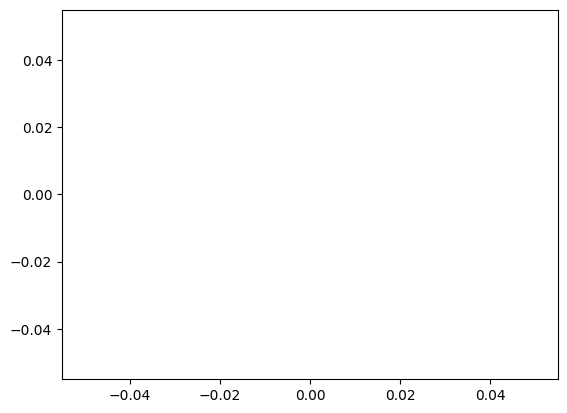

In [337]:
import matplotlib.pyplot as plt

g = Graph()
g.add_node()
g.add_node()
g.add_node()
g.add_node()

# TODO: plot the eigenvalues of the laplacian matrix
eig_values, _ = laplacian_values(g, g.N - 1)
plt.scatter([i for i in range(len(eig_values))], eig_values)

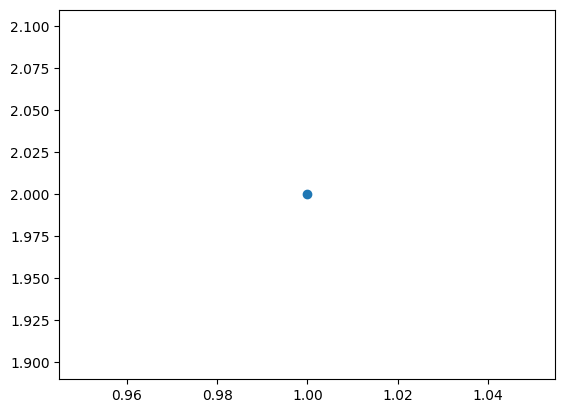

In [338]:
g.connect(0, 1)
# TODO: plot the eigenvalues of the laplacian matrix
eig_values, _ = laplacian_values(g, g.N - 1)
plt.scatter([i for i in range(1, len(eig_values) + 1)], eig_values)

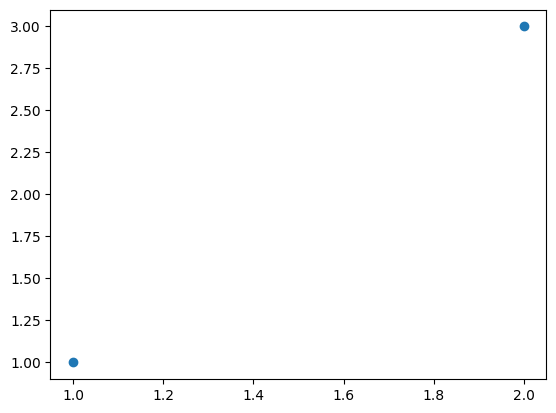

In [339]:
g.connect(1, 2)
# TODO: plot the eigenvalues of the laplacian matrix
eig_values, _ = laplacian_values(g, g.N - 1)
plt.scatter([i for i in range(1, len(eig_values) + 1)], eig_values)

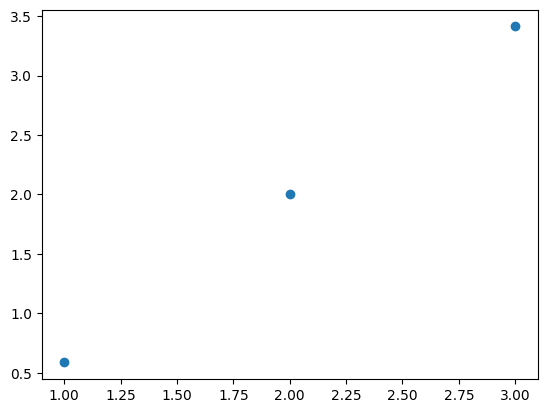

In [340]:
g.connect(2, 3)
# TODO: plot the eigenvalues of the laplacian matrix
eig_values, _ = laplacian_values(g, g.N - 1)
plt.scatter([i for i in range(1, len(eig_values) + 1)], eig_values)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


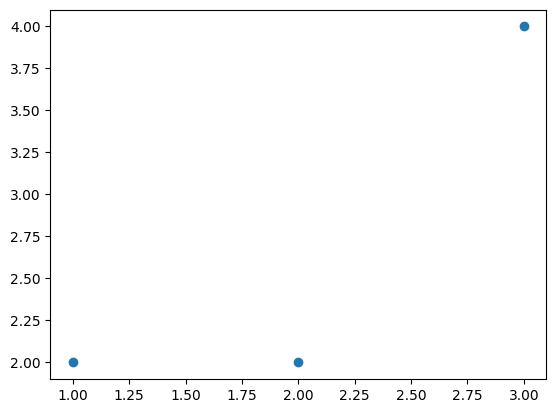

In [341]:
g.connect(3, 0)
# TODO: plot the eigenvalues of the laplacian matrix
eig_values, _ = laplacian_values(g, g.N - 1)
plt.scatter([i for i in range(1, len(eig_values) + 1)], eig_values)

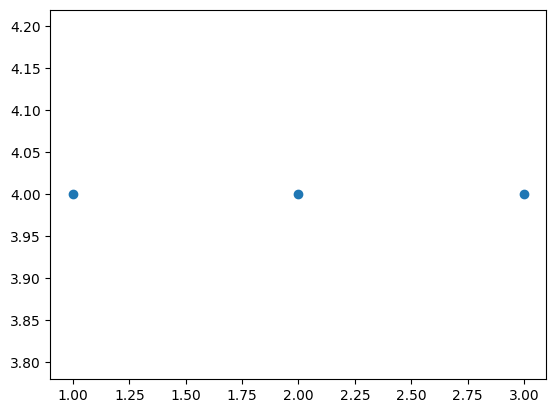

In [342]:
g.connect(0, 2)
g.connect(1, 3)
# TODO: plot the eigenvalues of the laplacian matrix
eig_values, _ = laplacian_values(g, g.N - 1)
plt.scatter([i for i in range(1, len(eig_values) + 1)], eig_values)

**Explain the meaning of the eigenvalues and describe the change in the eigenvalues as the edges were added to the graph here**:

We can learn about the connectivity of a graph by knowing its eigenvalues. As we saw earlier, the second smallest eigenvalue named Fielder value will tell us whether the graph is disconnected or not. If the Fielder value is 0 then the graph is disconnected and if its positive it tells us how well the graph is connected. If we look at the plots(which are for a graph with 4 nodes), we see that in the first 3 ones have less than 3 positive eigenvalues and it means that the Fielder value is 0 and thus the graph is disconnected and has (# of nodes - # of positive eigenvalues) disconnected parts. The first plot has 0 positive eigenvalues and thats because there is no vertices between the nodes and the graph is fully disconnected. The second/third plots have 1/2 positive eigenvalues which means that they have 3/2 disconnected parts. the other 3 plots all have 3 positive eigenvalues besides the 0 eigenvalue that all laplacian matrices have. As we said now the Fielder value tells us how well the graph is connected. Higher the Fielder value, better the graph connectivity. For example the fourth plot has Fielder value of ~0.58 and the sixth plot has Fielder value of ~4 and as we can see the sixth plot which has every vertex possible has a better connectivity than the fourth plot which only has 3 vertices and can easily be disconnected by removing one of them. The same condition applies to the fifth plot which has less connectivity than the sixth plot and better connectivity than the fourth plot.

## Clustering Eigenvectors

Next we use KMeans to cluster the data points in the lower dimensional space. We can then assign each data point to the cluster with the nearest centroid. Finally, we can plot the data points and color them according to their cluster assignments. We can also plot the eigenvectors corresponding to the $k$ smallest eigenvalues. The eigenvectors can be viewed as the coordinates of the data points in the lower dimensional space. We can see that the eigenvectors corresponding to the $k$ smallest eigenvalues can separate the data points into $k$ clusters.

In [343]:
from sklearn.cluster import KMeans

def cluster(graph: Graph, N: int):
    assert N <= graph.N
    clusterer = KMeans(N)
    _, vecs = laplacian_values(graph, N)
    clusterer.fit(vecs)
    graph.clustered_nodes = dict([i, set()] for i in range(N))
    for N, label in enumerate(clusterer.labels_):
        graph.clustered_nodes[label].add(N)

In [344]:
import matplotlib.colors as mcolors
import graphviz

def plot(graph: Graph):
    g = graphviz.Graph()
    for cluster, color in zip(graph.clustered_nodes.keys(), mcolors.CSS4_COLORS.values()):
        with g.subgraph(name=f'C{cluster}') as gcl:
            for node in graph.clustered_nodes[cluster]:
                gcl.node(f'N{node}', style='filled', fillcolor=color)
    for A in graph.nodes:
        for B in graph.vertices[A]:
            if B > A:
                g.edge(f'N{A}', f'N{B}')
    g.view()

In [345]:
g = Graph()
g.add_node()
g.add_node()
g.connect(0, 1)
g.add_node()
g.connect(0, 2)
g.connect(1, 2)
g.add_node()
g.add_node()
g.connect(3, 4)
g.add_node()
g.connect(3, 5)
g.connect(4, 5)
g.add_node()
g.connect(5, 6)
g.add_node()
g.connect(5, 7)
g.connect(6, 7)
g.add_node()
g.connect(0, 8)
g.add_node()
g.connect(0, 9)
g.connect(8, 9)
g.connect(0, 5)
cluster(g, 3)
plot(g)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Cluster Circles

First we make the circles. We can use the make_circles function in sklearn.datasets to make two circles. We can then plot the circles. We can see that the circles are not linearly separable.

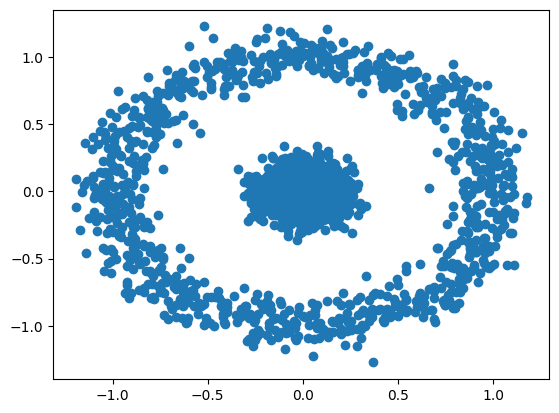

In [346]:
from sklearn.datasets import make_circles

X, labels = make_circles(n_samples=2000, noise=.1, factor=.1)
plt.plot(X[:,0], X[:,1], 'o')
plt.show()

Now we construct adjacency matrix using kNN. We use kneighbors_graph function in sklearn.neighbors to construct the adjacency matrix. We can then construct the degree matrix and the laplacian matrix. We can then calculate the eigenvectors and eigenvalues of the laplacian matrix.

In [347]:
from sklearn.neighbors import kneighbors_graph

adjacency_matrix = kneighbors_graph(X, n_neighbors=5).toarray()
# TODO: construct laplacian matrix
degree_matrix = np.diag(adjacency_matrix.sum(axis=1))
laplacian_matrix = degree_matrix - adjacency_matrix
# TODO: calculate eigenvalues and eigenvectors of laplacian matrix and sort them in ascending order of eigenvalues
vals, vecs = np.linalg.eig(laplacian_matrix)
vals, vecs = vals[np.argsort(vals)], vecs[:, np.argsort(vals)]

Now let's cluster them using the Fielder value. We can see that the circles are separated into two clusters.

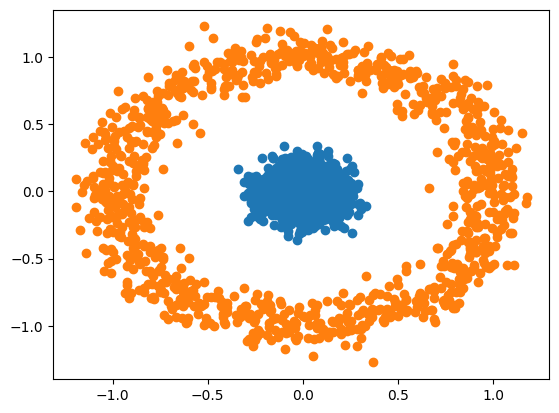

In [348]:
clusters = vecs[:,1] > 0
plt.plot(X[clusters,0], X[clusters,1], 'o')
plt.plot(X[~clusters,0], X[~clusters,1], 'o')
plt.show()